In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("ratings.txt", delimiter = '\t')
data = data.drop(columns = 'id')
data.head()

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [3]:
data.label.value_counts()

1    100000
0    100000
Name: label, dtype: int64

In [4]:
df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")
df16 = pd.read_csv("0127.csv", encoding="utf-8")
df17 = pd.read_csv("0128.csv", encoding="utf-8")
df18 = pd.read_csv("0129.csv", encoding="utf-8")
df19 = pd.read_csv("0130.csv", encoding="utf-8")
df20 = pd.read_csv("0131.csv", encoding="utf-8")

In [5]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20], axis=0, ignore_index = True)
data2 = data2.rename(columns = {'sentence':'document'})

def rating_to_label(score):
    if score >= 8:
        return 1
    if score <= 5:
        return 0
    
data2['label'] = data2['score'].apply(lambda x: rating_to_label(x))
data2 = data2.drop(columns = 'score')
data2 = data2.dropna(axis = 0)

In [6]:
data2.set_index('document',inplace=True)
data2 = data2.astype('int')
data2.reset_index(inplace=True)
data2.head()

,document,label
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",1
1,큐브가 훨씬 재미있었던 것 같다,0
2,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,1
3,넷플로시청하기에 10점~배우분들 매력 최고,1
4,이걸 영화라고....,0


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50889 entries, 0 to 50888
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  50889 non-null  object
 1   label     50889 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 596.5+ KB


In [8]:
data2.label.value_counts()

1    39047
0    11842
Name: label, dtype: int64

In [9]:
df = pd.concat([data2, data], axis=0, ignore_index = True)
df.shape

(250889, 2)

# 데이터 전처리

In [10]:
df.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

C:\Users\user\AppData\Local\Temp\ipykernel_27424\1520741230.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\user\AppData\Local\Temp\ipykernel_27424\1520741230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


전처리 후 테스트용 샘플의 개수 : 243280


In [11]:
df["label"].value_counts()

1    134705
0    108575
Name: label, dtype: int64

In [12]:
df = pd.concat([df[df['label']==0].head(100000),df[df['label']==1].head(100000)], axis=0, ignore_index = True)
df.head()

,document,label
0,큐브가 훨씬 재미있었던 것 같다,0
1,이걸 영화라고,0
2,절대 보지 마세요완전 지루하고 노잼입니다평점이 도저히 이해가 안갑니다돈이 너무 아깝...,0
3,그렇게 하고싶냐,0
4,연필로 복지란 글자를 힘껏 쓰다 심이 부러짐,0


In [13]:
df["label"].value_counts()

0    100000
1    100000
Name: label, dtype: int64

<AxesSubplot:>

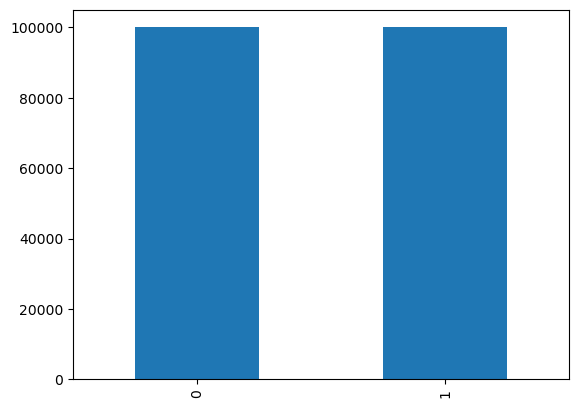

In [14]:
df['label'].value_counts().sort_index(ascending=True).plot(kind='bar')

## 학습용 데이터 가공

In [15]:
import re
import nltk
from konlpy.tag import Okt; t = Okt()

In [18]:
content_list = df['document']

In [20]:
content_text = ''

for each_line in content_list[:]:
    content_text = content_text + each_line

In [22]:
tokens_ko = t.morphs(content_text)
tokens_ko

['큐브',
 '가',
 '훨씬',
 '재미있었던',
 '것',
 '같다',
 '이',
 '걸',
 '영화',
 '라고',
 '절대',
 '보지',
 '마세요',
 '완전',
 '지루하고',
 '노잼',
 '입니다',
 '평점',
 '이',
 '도저히',
 '이해',
 '가',
 '안',
 '갑니다',
 '돈',
 '이',
 '너무',
 '아깝습니다',
 '그렇게',
 '하고싶냐',
 '연필',
 '로',
 '복지',
 '란',
 '글자',
 '를',
 '힘껏',
 '쓰다',
 '심',
 '이',
 '부러짐',
 '뛰는',
 '놈',
 '위',
 '에',
 '나',
 '는',
 '놈',
 '그',
 '위',
 '에',
 '보는',
 '놈',
 '전개',
 '성은',
 '비행기',
 '이륙',
 '하는',
 '순간',
 '떨군',
 '것',
 '같아요',
 '좋은',
 '배우',
 '분들',
 '로',
 '이런',
 '영화',
 '를',
 '찍은게',
 '너무',
 '아쉽네요',
 '그냥',
 '일본만화',
 'ㅋㅋ',
 '하도',
 '볼',
 '게',
 '없어서',
 '봐',
 '봤는데',
 '기대',
 '이상',
 '의',
 '망작',
 '동시녹음',
 '은',
 '엉망',
 '이고',
 '스토리',
 '는',
 '없고',
 '연기',
 '는',
 '개판',
 '이고',
 '마지막',
 '으로',
 '연출',
 '은',
 '할',
 '말',
 '없게',
 '만든다',
 '노력',
 '이',
 '가상해서',
 '점',
 '리뷰',
 '들',
 '전부',
 '알바',
 '천지',
 '연기',
 '가',
 '뭐',
 '어째',
 '급',
 '도',
 '아니고',
 '급',
 '영화',
 '킬링타임',
 '용도',
 '안됨',
 '분명',
 '영화',
 '에서',
 '보여주려는',
 '건',
 '산티아고',
 '프랑스',
 '길',
 '같은데',
 '감독',
 '은',
 '도대체',
 '이',
 '영화',
 '를',
 '어디서',
 '어느',
 '배경',
 '을',

In [23]:
ko = nltk.Text(tokens_ko)
print(len(ko.tokens)) #토큰 전체 개수
print(len(set(ko.tokens))) #토큰 unique 개수

2918737
130602


In [24]:
ko.vocab().most_common(100)

[('이', 83418),
 ('영화', 71001),
 ('의', 44875),
 ('가', 41746),
 ('에', 41381),
 ('을', 36606),
 ('도', 32890),
 ('들', 31270),
 ('는', 26976),
 ('를', 26108),
 ('은', 24403),
 ('너무', 19967),
 ('한', 17195),
 ('다', 14529),
 ('만', 13556),
 ('적', 13235),
 ('으로', 13189),
 ('로', 12678),
 ('진짜', 12588),
 ('정말', 12334),
 ('연기', 11743),
 ('에서', 11163),
 ('과', 10298),
 ('것', 10076),
 ('스토리', 9999),
 ('잘', 9914),
 ('감동', 9405),
 ('그', 9232),
 ('점', 9155),
 ('생각', 9092),
 ('배우', 9057),
 ('안', 9015),
 ('평점', 8837),
 ('와', 8498),
 ('인', 8146),
 ('최고', 7785),
 ('나', 7767),
 ('못', 7747),
 ('내', 7733),
 ('하고', 7725),
 ('더', 7584),
 ('왜', 7522),
 ('사람', 7494),
 ('보고', 7402),
 ('하는', 7387),
 ('이런', 7387),
 ('고', 7312),
 ('게', 7178),
 ('시간', 6900),
 ('드라마', 6514),
 ('감독', 6366),
 ('때', 6348),
 ('말', 6280),
 ('그냥', 6217),
 ('수', 6141),
 ('이다', 6133),
 ('요', 6000),
 ('까지', 5980),
 ('본', 5843),
 ('네', 5832),
 ('내용', 5636),
 ('보다', 5610),
 ('재미', 5501),
 ('좀', 5400),
 ('거', 5242),
 ('뭐', 5214),
 ('중', 5097),
 ('없는', 5

In [59]:
stop_words = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
print(stop_words[:10])

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해']]


In [76]:
movie_stopwords = ['이','의','가','에','들','도','을','영화','를','은','이다','너무','다','적','으로','로','진짜','정말','연기','에서','과','것','아',
                   '스토리','그','점','생각','배우','인','나','못','내','더','왜','사람','고','게','','때','수','요','까지','네','좀','거','뭐','중']
for word in movie_stopwords:
    stop_words.append(word)

In [77]:
def extract_okt(text):
    test = text.lower()
    result = t.morphs(text, stem = True)
    result = [x for x in result if x not in stop_words]
    return " ".join(result)

In [78]:
# 불용어 처리 함수 적용
from tqdm import tqdm

tokens_ko =[]
for text in tqdm(ko):
    tokens_ko.append(extract_okt(text))

100%|██████████████████████████████████████████████████████████████████████| 2535550/2535550 [04:15<00:00, 9910.85it/s]


In [79]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('', 384678),
 ('하다', 83203),
 ('보다', 67538),
 ('늘다', 27192),
 ('없다', 23144),
 ('있다', 20836),
 ('좋다', 19998),
 ('되다', 14175),
 ('재밌다', 13978),
 ('만', 13556),
 ('같다', 13386),
 ('않다', 12000),
 ('아니다', 11512),
 ('오다', 11216),
 ('자다', 10872),
 ('나오다', 10053),
 ('만들다', 9922),
 ('감동', 9405),
 ('안', 9015),
 ('이렇다', 8978),
 ('평점', 8837),
 ('최고', 7785),
 ('보고', 7404),
 ('시간', 6900),
 ('드라마', 6514),
 ('감독', 6366),
 ('아깝다', 6299),
 ('말', 6281),
 ('그냥', 6217),
 ('지다', 5965),
 ('재미있다', 5729),
 ('내용', 5636),
 ('재미', 5501),
 ('모르다', 5353),
 ('주다', 5293),
 ('그렇다', 5261),
 ('지루하다', 5256),
 ('싶다', 5052),
 ('ㅋㅋ', 5023),
 ('볼', 5008),
 ('가다', 4910),
 ('재미없다', 4856),
 ('연출', 4771),
 ('들다', 4656),
 ('알다', 4522),
 ('작품', 4429),
 ('쓰레기', 4336),
 ('정도', 4316),
 ('마지막', 4303),
 ('하나', 4248)]

In [97]:
# 형태소 분석을 위한 함수
def tokenizer(text):
    okt=Okt()
    return okt.morphs(text)

In [98]:
def step1_data_preprocessing():

    text_list = df['document']
    star_list = df['label']

    from sklearn.model_selection import train_test_split
    text_train, text_test, star_train, star_test = train_test_split(text_list, star_list, test_size=0.2, random_state=0)   
    return text_train, text_test, star_train, star_test

In [99]:
def step2_learning(X_train, y_train, X_test, y_test):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)
    
    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression(C=10.0, penalty='l2', random_state=0)
    
    from sklearn.pipeline import Pipeline
    pipe = Pipeline([('vect', tfidf), ('clf', logistic)]) 
    pipe.fit(X_train.fillna(' '), y_train)
    
    from sklearn.metrics import accuracy_score
    y_pred = pipe.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    
    import pickle
    with open('pipe.dat', 'wb') as fp:
        pickle.dump(pipe, fp)
        
    print("저장 완료")

In [185]:
def step3_using_model():
    import pickle
    with open('pipe.dat', 'rb') as fp:
        pipe = pickle.load(fp)
        
    import numpy as np
    
    while True:
        text=input('리뷰를 작성해주세요:')
        
        str=[text]
        
        r1=np.max(pipe.predict_proba(str)*100) #예측 정확도
        r2=pipe.predict(str)[0] #예측 결과
        
        if r2 ==1:
            print('%.3f의 확률로 긍정적인 리뷰입니다' %r1)
        else:
            print('%.3f의 확률로 부정적인 리뷰입니다' %r1)
        break

# 학습 함수
def learning():
    text_train, text_test, star_train, star_test = step1_data_preprocessing()
    step2_learning(text_train, star_train, text_test, star_test)
    
# 사용 함수
def using():
    step3_using_model()

In [101]:
learning()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8586
저장 완료


In [187]:
using()

리뷰를 작성해주세요: 생각보다 별로였음. 스토리도 진부하고 감동도 없는 영화


98.312의 확률로 부정적인 리뷰입니다
